# Online and mail shopping time series analysis and prediction

In [8]:
# 1. Import Dataset
import pandas as pd
import matplotlib.pyplot as plt

shopping_df = pd.read_csv("online_and_mail_shopping.csv", header = 0, parse_dates = [0], index_col = 0,squeeze=0)
shopping_df

C:\Users\TorstenSchmidt\AppData\Local\Temp\ipykernel_6604\2096088575.py:5: FutureWarning:

The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.





,mdollars
month,
2002-01-01,9912
2002-02-01,8925
2002-03-01,9670
2002-04-01,9684
2002-05-01,9713
...,...
2013-08-01,29297
2013-09-01,28283
2013-10-01,29657


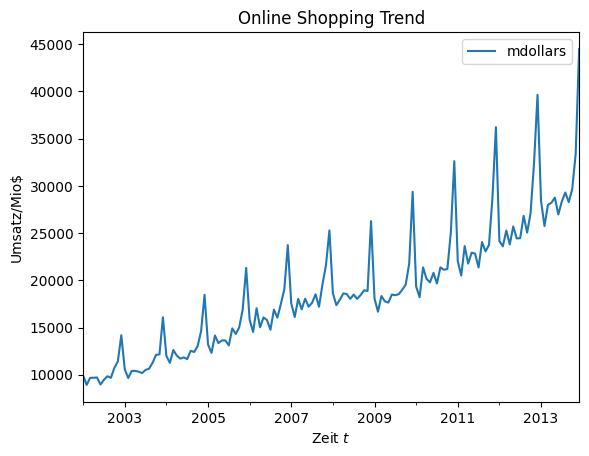

In [9]:
# 2. Plot der originalen Zeitreihe
fig, ax = plt.subplots()
ax.set_title("Online Shopping Trend")
shopping_df.plot(ax=ax)
ax.set_xlabel('Zeit $t$')
ax.set_ylabel('Umsatz/Mio$')
plt.show()

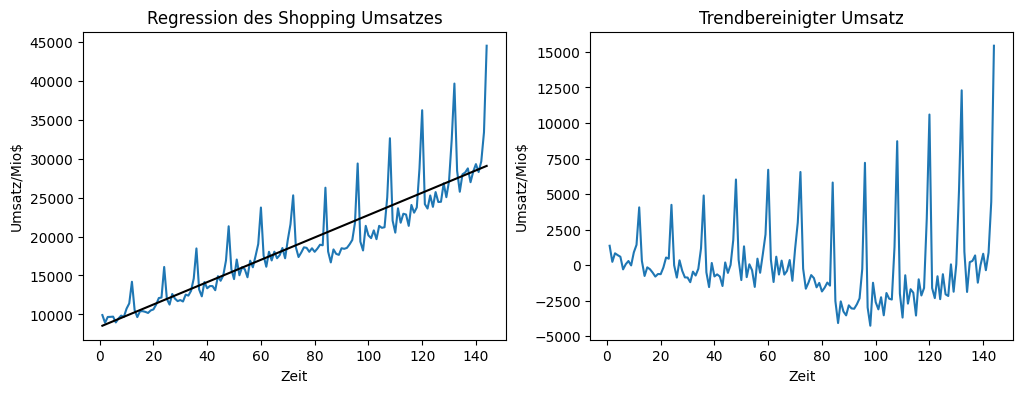

array([[  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
      

In [10]:
# 3. Lineare Regression und Trendbereinigung
import numpy as np
from sklearn.linear_model import LinearRegression


X = np.arange(1,shopping_df.shape[0]+1).reshape(-1,1)
Y = shopping_df.values

regr = LinearRegression()
regr.fit(X,Y)
T_pred = regr.predict(X)
shopping_detrended = shopping_df - T_pred

f, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].set_title('Regression des Shopping Umsatzes')
axes[0].plot(X, Y)
axes[0].plot(X, T_pred, color='black')
axes[0].set_xlabel('Zeit')
axes[0].set_ylabel('Umsatz/Mio$')

axes[1].set_title('Trendbereinigter Umsatz')
axes[1].plot(X, shopping_detrended)
axes[1].set_xlabel('Zeit')
axes[1].set_ylabel('Umsatz/Mio$')
plt.show()
X

In [11]:
# nochmal Plot mit Plotly Express
import plotly.express as px

fig = px.line(shopping_detrended, x=shopping_detrended.index, y="mdollars", title='Shopping detrended')
fig.show()

Die Kurve deutet darauf hin, dass in den "Dezembern" das Weihnachtsgeschäft deutlich aus dem sonstigen Kaufgeschehen hinausgeht und sich über die Jahre auch verstärkt

In [13]:
# 4. Saisonbereinigung der trendbereinigten Zeitreihe
monthly_means = shopping_detrended.groupby(shopping_detrended.index.month).mean()
# Berechnung der Differenz aus den jeweiligen Monatsumsätzen minus den dem zugehörigen Monatsmittelwert über die Jahre
shopping_detrended_unseasonal = shopping_detrended - np.tile(monthly_means,(12,1))

# Plot detrended und unseasonal
df = pd.DataFrame()
df['mdollars'] = shopping_detrended_unseasonal
df['months'] = shopping_df.index
fig = px.line(df, x="months", y="mdollars", title='Shopping detrended_unseasonal')
fig.show()
monthly_means


,mdollars
month,
1,-539.682037
2,-1918.177979
3,-263.673922
4,-1133.003198
5,-851.665808
6,-1301.661751
7,-1553.824360
8,-564.153636
9,-1175.482913


Nun sieht man deutlich, dass auch bei den saisonbereinigten Daten das Weihnachtsgeschäft doch noch zu sehen ist. Das liegt daran, dass es zwar bei der sonstigen detrendet Zeitreihe keinen Aufwärtstrend mehr gibt aber doch eine stetige Aufweitung der Weihnachtsgeschäfts-Pulse. Damit ist unser Detrending und Unseasonaling etwas "überfordert". Allerdings wurde trotzdem der maßgeblich Teil der Saisonalität herausgerechnet (wesentlich geringere Peaks und Schwankungen als die ursprüngliche Kurve).

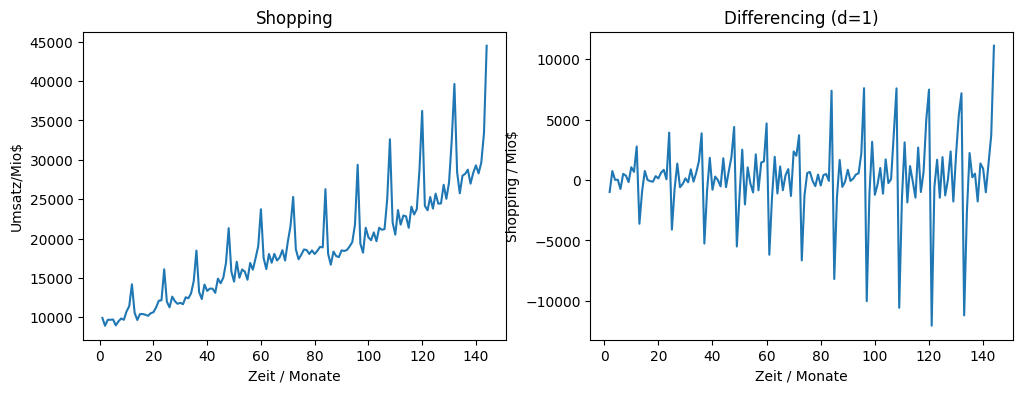

In [14]:
# 5. Differencing (wir starten wieder beim originalen Datensatz!)
shopping_differenced = shopping_df.diff(1)

f, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].set_title('Shopping')
axes[0].plot(X, Y)
axes[0].set_xlabel('Zeit / Monate')
axes[0].set_ylabel('Umsatz/Mio$')

axes[1].set_title('Differencing (d=1)')
axes[1].plot(X, shopping_differenced)
axes[1].set_xlabel('Zeit / Monate')
axes[1].set_ylabel('Shopping / Mio$')
plt.show()

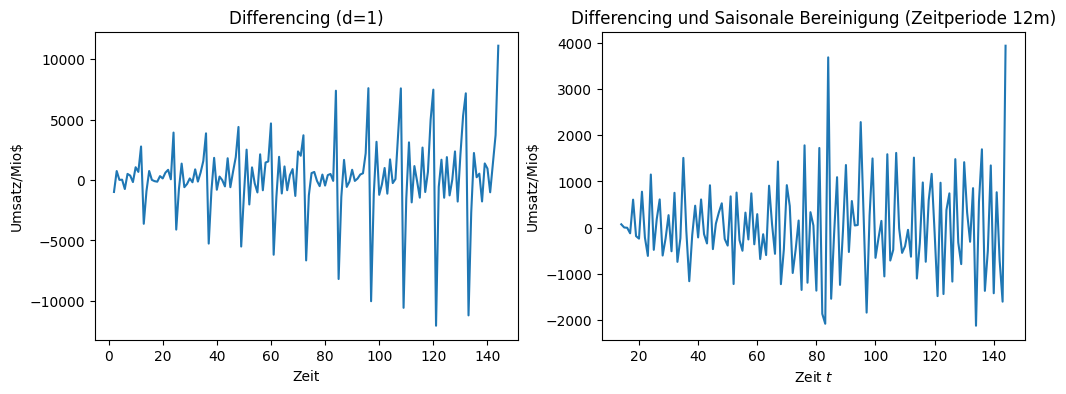

In [15]:
# 6. Zusätzliche Bereining der Saisonalität
shopping_differenced_unseasonal = shopping_differenced.diff(periods=12)

f, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].set_title('Differencing (d=1)')
axes[0].plot(X, shopping_differenced)
axes[0].set_xlabel('Zeit')
axes[0].set_ylabel('Umsatz/Mio$')

axes[1].set_title('Differencing und Saisonale Bereinigung (Zeitperiode 12m)')
axes[1].plot(X, shopping_differenced_unseasonal)
axes[1].set_xlabel('Zeit $t$')
axes[1].set_ylabel('Umsatz/Mio$')
plt.show()

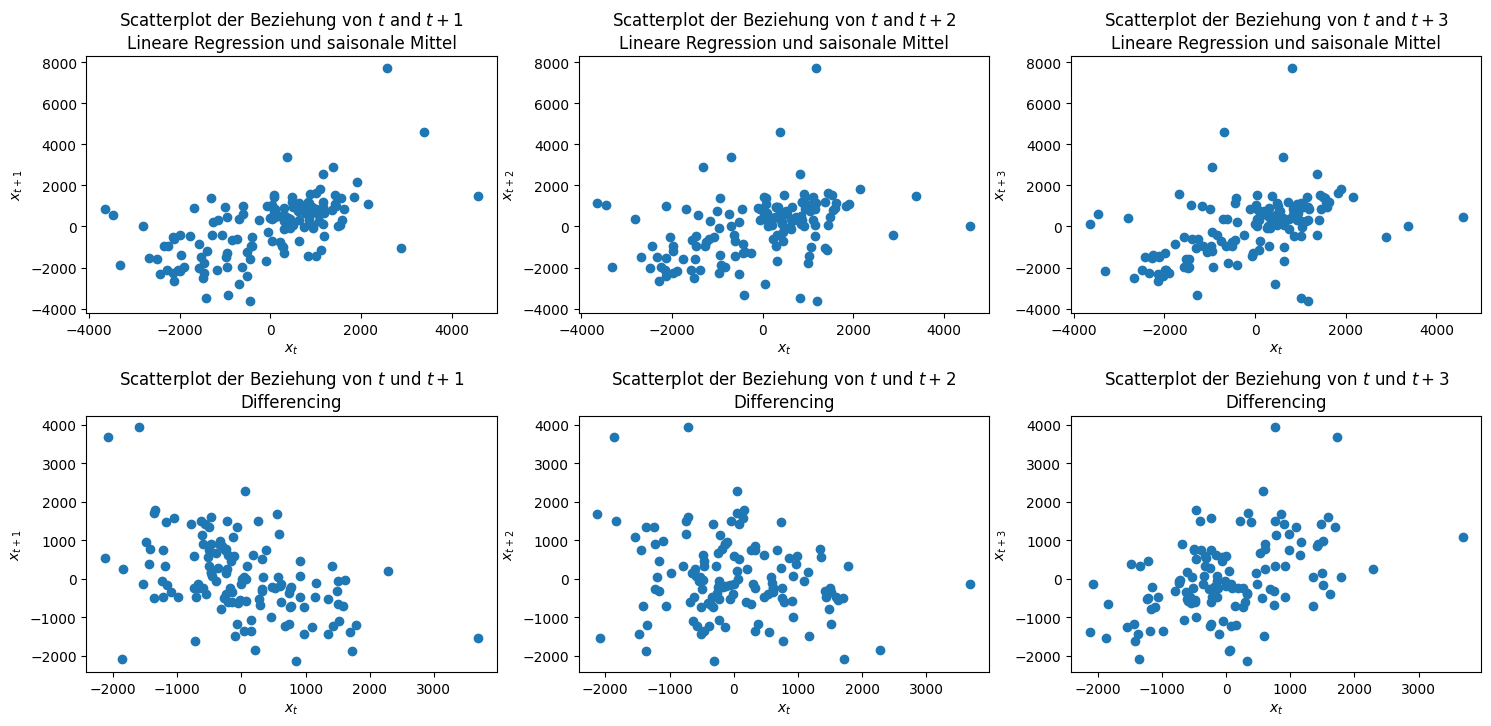

In [16]:
# 7. Autokorrelation
from pandas.plotting import lag_plot

fig, axes = plt.subplots(2, 3, figsize=(18, 7))

for i in range(1,4):
    axes[0,i-1].set_title('Scatterplot der Beziehung von $t$ and $t+%i$\nLineare Regression und saisonale Mittel' % i)
    lag_plot(shopping_detrended_unseasonal,lag=i, ax=axes[0,i-1])
    axes[0,i-1].set_xlabel('$x_t$')
    axes[0,i-1].set_ylabel('$x_{t+%i}$'%i)

    axes[1,i-1].set_title('Scatterplot der Beziehung von $t$ und $t+%i$\nDifferencing'%i)
    lag_plot(shopping_differenced_unseasonal,lag=i, ax=axes[1,i-1])
    axes[1,i-1].set_xlabel('$x_t$')
    axes[1,i-1].set_ylabel('$x_{t+%i}$'%i)

plt.subplots_adjust(left=None, bottom=0, right=None,
                top=None, wspace=None, hspace=0.4)
plt.show()

D:\Lehre\Zeitreihen_Analyse_und_Prädiktion\Code\venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



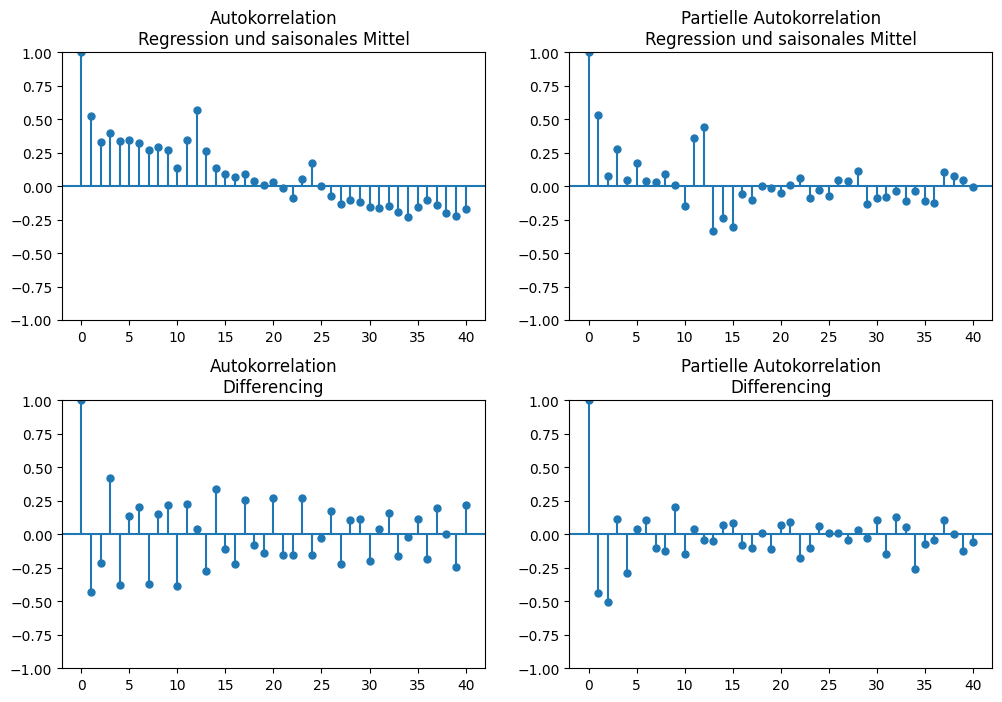

In [17]:
# 8. Partielle Autokorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2, 2, figsize=(12, 7))

plot_acf(shopping_detrended_unseasonal, lags=40, alpha=None, ax=axes[0,0], title="Autokorrelation\nRegression und saisonales Mittel")
plot_pacf(shopping_detrended_unseasonal, lags=40, alpha=None, ax=axes[0,1], title="Partielle Autokorrelation\nRegression und saisonales Mittel")
plot_acf(shopping_differenced_unseasonal.dropna(), lags=40, alpha=None, ax=axes[1,0], title="Autokorrelation\nDifferencing")
plot_pacf(shopping_differenced_unseasonal.dropna(), lags=40, alpha=None, ax=axes[1,1], title="Partielle Autokorrelation\nDifferencing")
plt.subplots_adjust(left=None, bottom=0, right=None,
                top=None, wspace=None, hspace=0.3)
plt.show()

Die Kurven für die per Regression trendbereinigten Kurven sind sehr klar und illustrativ: der Umsatz eines Monats in diesem Jahr steht in einem positiv korrelativen Zusammenhang mit dem Umsatz im gleichen Monat im nächsten Jahr. Dafür geht der Umsatz in den darauf folgenden Monaten (Zeitdifferenz größer 12M) etwas zurück. Die Differencing Kurven sind etwas schwerer zu deuten. Die Monatsdifferenz jetzt (u_M - ( u_M-1 )) hat einen positiven Einfluss auf die Monatsdifferenz (u_M+1 -u_M) aber einen negativen Einfluss auf die Differenzen der nächsten Monate. Wenn es also in den trendbereinigten Daten einen Umsatzanstieg gibt, dann hält er im Durchschnitt einen Monat an und führt in den Folgemonaten zu einem leichten Rückgang.

In [21]:
# 9. ARIMA mit regressivem, unseasonal und log - Daten
from statsmodels.tsa.statespace.sarimax import SARIMAX

# order of ARIMA-Model: (p, d, q), where:
#    p represents the order of the AutoRegressive (AR) component, which captures the linear relationship between the current observation and its past values.
#    d represents the order of differencing required to make the time series stationary. It indicates how many differences you need to take to achieve stationarity.
#    q represents the order of the Moving Average (MA) component, which captures the linear relationship between the current observation and past residuals.
df_test = shopping_detrended_unseasonal.iloc[132:146,:]
df_train = shopping_detrended_unseasonal.iloc[0:132,:]
df_train['log']=np.log(df_train['mdollars'])
arima = SARIMAX(df_train['log'], order=(15,1,1))
result = arima.fit()
result.summary()

D:\Lehre\Zeitreihen_Analyse_und_Prädiktion\Code\venv\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning:

invalid value encountered in log

C:\Users\TorstenSchmidt\AppData\Local\Temp\ipykernel_6604\4052909728.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\Lehre\Zeitreihen_Analyse_und_Prädiktion\Code\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

D:\Lehre\Zeitreihen_Analyse_und_Prädiktion\Code\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

D:\Lehre\Zeitreihen_Analyse_und_Prädiktion\Code\venv\lib\site-packages\sta

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    log   No. Observations:                  132
Model:              SARIMAX(15, 1, 1)   Log Likelihood                 -83.961
Date:                Sun, 07 Jan 2024   AIC                            201.922
Time:                        23:05:08   BIC                            250.800
Sample:                    01-01-2002   HQIC                           221.783
                         - 12-01-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8244      2.048     -0.403      0.687      -4.838       3.190
ar.L2         -0.8940      1.680     -0.532      0.595      -4.186       2.398
ar.L3         -0.3161      1.891     -0.167      0.867      -4.022       3.390
ar.L4         -0.2353      0.817     -0.288      0.773      -1.836       1.366
ar.L5          0.2968      0.700      0.424      0.672      -1.076       1.670
ar.L6          0.0733      0.565      0.130      0.897      -1.034       1.181
ar.L7          0.1751      0.406      0.431      0.667      -0.622       0.972
ar.L8         -0.2807      0.401     -0.699      0.484      -1.068       0.506
ar.L9         -0.0852      0.599     -0.142      0.887      -1.260       1.089
ar.L10        -0.5193      0.304     -1.708      0.088      -1.115       0.077
ar.L11        -0.3523      1.063     -0.331      0.740      -2.436       1.731
ar.L12        -0.2954      0.852     -0.347      0.729      -1.966       1.375
ar.L13        -0.0493      0.774     -0.064      0.949      -1.567       1.468
ar.L14         0.1720      0.450      0.382      0.703      -0.711       1.055
ar.L15         0.1359      0.265      0.513      0.608      -0.384       0.656
ma.L1          0.0055      2.046      0.003      0.998      -4.004       4.016
sigma2         0.4652      0.122      3.826      0.000       0.227       0.703
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               100.04
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.39   Skew:                            -0.83
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
# 10. Prädiktion der Werte für 2013
df_test = shopping_detrended_unseasonal.iloc[132:146,:]
pred_2013 = pd.DataFrame()
pred_2013['months'] = df_test.index
pred_2013.set_index('months')

# Einberechnung des saisonalen Anteils
pred_2013['mdollars'] =monthly_means['mdollars'].values

# Einbeziehung des Trend-Anteils
X = np.linspace(132,144,12)
X = X.reshape(-1,1)
trend_pred = regr.predict(X)
pred_2013['mdollars'] = pred_2013['mdollars'] + trend_pred[:,0]
pred_2013['data']='predicted'

# Einbeziehung des Residual-Anteils
residual = result.forecast(12)
pred_2013['mdollars'] = pred_2013['mdollars'] + np.exp(residual.values)

pred_2013

,months,mdollars,data
0,2013-01-01,27981.749632,predicted
1,2013-02-01,27472.838797,predicted
2,2013-03-01,29327.307710,predicted
3,2013-04-01,29719.096093,predicted
4,2013-05-01,28697.108337,predicted
5,2013-06-01,29514.132685,predicted
6,2013-07-01,27535.060935,predicted
7,2013-08-01,30115.151501,predicted
8,2013-09-01,30288.146104,predicted
9,2013-10-01,29024.306185,predicted


In [23]:
#Vergleich mit den ursprünglichen Daten 2013
shopping_df_2013 = shopping_df
shopping_df_2013['data'] = 'true'
shopping_df_2013['months'] = shopping_df_2013.index

vergleich_2013 = pd.concat([pred_2013, shopping_df_2013], ignore_index=True, axis=0)
fig = px.line(vergleich_2013, x="months", y="mdollars", color='data')
fig.show()

Fazit: Prinzipiell kann man die Zeitreihe sinnvoll prädizieren. Allerdings funktioniert die Prädiktion nur richtig gut im Bereich des Residual Parts - also unter der Voraussetzung, dass die Zeitreihe stationär ist. Aber gerade die Zunahme des Weihnachtsgeschäfts macht die Zeitreihe sogar unter der Maßnahme des Tetrending und des Unseasoning leider instationär. Damit "beißt sich die Katze in den Schwanz". Wir sehen, dass ARIMA hier zwar funktioniert aber die nicht richtigen Peakhöhen voraussagt. Dies bleibt auch stabil so, auch wenn man mit den pdq-Parametern beliebig variiert.